Fuentes: [Colab](https://colab.research.google.com/drive/1hkJtllrFu8YrHV0QmMA5DCjRDo-8ZDia?usp=sharing) y [Youtube](https://www.youtube.com/watch?v=Q2UlOn4L6Pw)

In [1]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile


# Cargamos Base usuarios Primer Trimestre 2022
url_zip = 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_1_Trim_2022_txt.zip'           

http_response = urlopen(url_zip)
zipfile = ZipFile(BytesIO(http_response.read()))

base_usuarios = zipfile.open('EPH_usu_1er_Trim_2022_txt/usu_individual_T122.txt.txt')
base_hogar = zipfile.open('EPH_usu_1er_Trim_2022_txt/usu_hogar_T122.txt.txt')


import pandas as pd
df = pd.read_csv(base_usuarios, sep=';')
hog = pd.read_csv(base_hogar, sep = ';')

/tmp/ipykernel_1070143/2595729937.py:17: DtypeWarning: Columns (102,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base_usuarios, sep=';')
/tmp/ipykernel_1070143/2595729937.py:18: DtypeWarning: Columns (10,13,18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  hog = pd.read_csv(base_hogar, sep = ';')


In [2]:
df

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,2,1,43,N,14,104,...,10.0,10,77500,9,9.0,9,NaN,9.0,10,194
1,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,3,1,43,N,14,104,...,10.0,10,77500,9,9.0,9,NaN,9.0,10,194
2,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,4,1,43,N,14,104,...,10.0,10,77500,9,9.0,9,NaN,9.0,10,194
3,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,1,1,1,S,33,1741,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,2,1,1,S,33,1741,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49701,TQRMNOPRPHMNMLCDEIIAD00701192,2022,1,1,2,1,1,S,32,2131,...,NaN,9,187500,10,NaN,10,10.0,NaN,10,5143
49702,TQRMNOSRWHKMLUCDEIIAD00780103,2022,1,1,1,1,1,S,32,1513,...,NaN,5,56100,8,NaN,8,8.0,NaN,5,2777
49703,TQRMNOSRWHKMLUCDEIIAD00780103,2022,1,1,2,1,1,S,32,1513,...,NaN,5,56100,8,NaN,8,8.0,NaN,5,2777
49704,TQRMNOQRPHMMLPCDEFIAH00707721,2022,1,1,1,1,43,S,2,678,...,NaN,6,34000,5,5.0,5,5.0,NaN,5,2274


Nivel educativo - NIVEL_ED
- 1 = Primario incompleto (incluye
educación especial)
- 2 = primario completo
- 3 = Secundario incompleto
- 4 = secundario completo
- 5 = Superior universitario incompleto
- 6 = Superior universitario completo
- 7 = Sin instrucción
- 9 = Ns/ Nr

Categoria ocupacional - CAT_OCUP
(Para ocupados y desocupados con
ocupación anterior)
- 1 = Patrón
- 2 = Cuenta propia
- 3 = Obrero o empleado
- 4 = Trabajador familiar sin

P47T: Monto de ingreso total individual
(sumatoria ingresos laborales y no
laborales)

Ponderadores:
- Pondera: para casi todas las variables de las Bases, incluidas todas las variables referidas a Viviendas y Hogares
- Pondih: para calcular los ingresos de los hogares
- Pondiio: para el ingreso de la ocupación principal
- Pondii: para el ingreso total individual

In [4]:
columna_edad = "CH06"
columna_educacion = "NIVEL_ED" 
columna_ocup = "CAT_OCUP" 
columna_ingresos = "P47T"

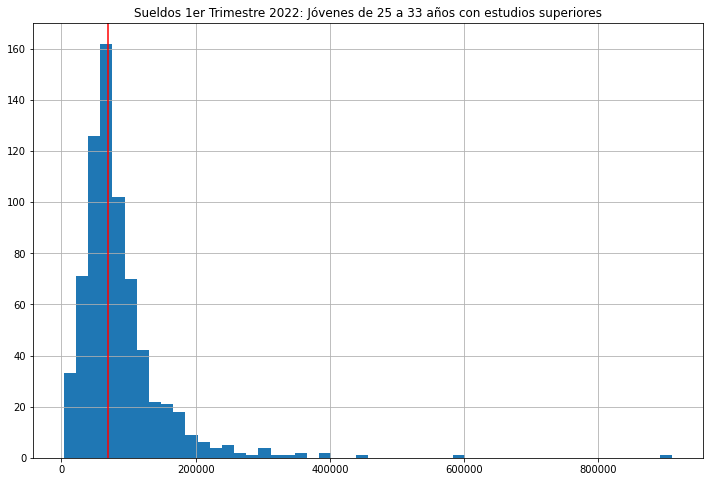

In [5]:
filtro_edad = (df[columna_edad] >= 25) & (df[columna_edad]<=33)
filtro_educ = df[columna_educacion] == 6
filtro_ocup = df[columna_ocup] == 3
filtro_ingresos_positivos = df[columna_ingresos ] >0

df_jovenes = df[filtro_educ & 
                filtro_edad & 
                filtro_ocup & 
                filtro_ingresos_positivos][columna_ingresos]

ax = df_jovenes.hist(bins=50, figsize=(12, 8))

ax.set_title("Sueldos 1er Trimestre 2022: Jóvenes de 25 a 33 años con estudios superiores")

ax.axvline(df_jovenes.median(), color="red")

In [6]:
print(df_jovenes.median())

70000.0


In [ ]:
df

In [7]:
# Calculamos la mediana del ingreso individual, ahora ponderandolo por todos los ponderadores de la base (correctos o no)

for ponderador in ["Pondih","Pondii","Pondiio", "Pondera"]:
  ponderador = ponderador.upper()
  df_jovenes_weighted = df[filtro_educ & 
                           filtro_edad & 
                           filtro_ocup & 
                           filtro_ingresos_positivos][[columna_ingresos, ponderador]]
# Ordenamos por ingresos, de menor a mayor
  df_jovenes_weighted.sort_values(columna_ingresos, inplace=True)
# Acumulamos el ponderador. El último registro de la suma acumulada, arroja como resultado el total de personas
# que está representando.
  cumsum = df_jovenes_weighted[ponderador].cumsum()

# Encontramos la mitad de la gente que representa, dividiendo por 2 la suma.
  cutoff = df_jovenes_weighted[ponderador].sum() *.5

  median = df_jovenes_weighted[columna_ingresos][cumsum >= cutoff].iloc[0]

  print(ponderador, ":", median)

PONDIH : 80000.0
PONDII : 83000.0
PONDIIO : 80000.0
PONDERA : 80000.0


PONDII : 83000.0


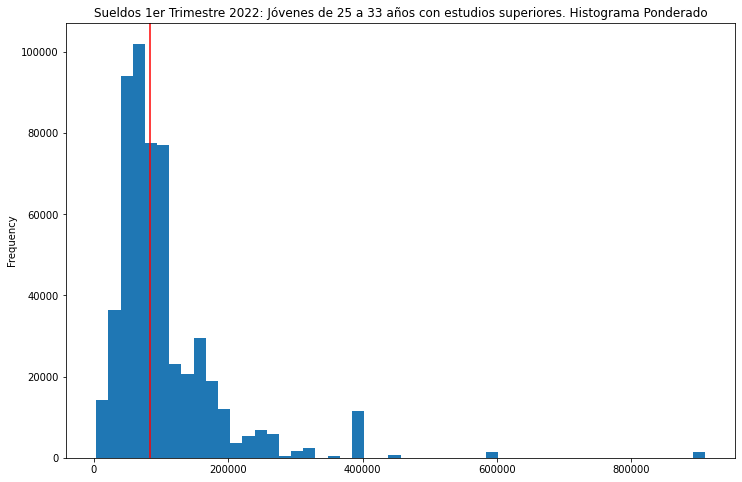

In [8]:
ponderador = "Pondii".upper()
df_jovenes_weighted = df[filtro_educ & 
                         filtro_edad & 
                         filtro_ocup & 
                         filtro_ingresos_positivos][[columna_ingresos, ponderador]]


df_jovenes_weighted.sort_values(columna_ingresos, inplace=True)

ax = df_jovenes_weighted[columna_ingresos].plot(kind="hist", 
                                                weights=df_jovenes_weighted[ponderador],
                                                bins=50, 
                                                figsize=(12, 8)
                                               )

ax.set_title("Sueldos 1er Trimestre 2022: Jóvenes de 25 a 33 años con estudios superiores. Histograma Ponderado")
cumsum = df_jovenes_weighted[ponderador].cumsum()
cutoff = df_jovenes_weighted[ponderador].sum() *.5
median = df_jovenes_weighted[columna_ingresos][cumsum >= cutoff].iloc[0]
print(ponderador, ":", median)
ax.axvline(median, color="red")

In [ ]:
# costo_metro_cuadrado = 350000
costo_metro_cuadrado = 65000

In [ ]:
print(f"Sueldo anual en metros cuadrados: {df_jovenes.median()*12/costo_metro_cuadrado:.2f} metros cuadrados por año")
print(f"Años de sueldo para comprar un dos ambientes de 30m2: {costo_metro_cuadrado*30/(df_jovenes.median()*12):.2f} años")

In [ ]:
df_adultos = df[filtro_educ & filtro_ocup & filtro_ingresos_positivos][[columna_ingresos, ponderador]]

ax = df_adultos[columna_ingresos].plot(kind="hist", 
                                                weights=df_adultos[ponderador],
                                                bins=50, 
                                                figsize=(12, 8)
                                               )

ax.set_title("Sueldos 1er Trimestre 2022: Adultos con estudios superiores")


In [ ]:
df_adultos.median()

# Analisis II

In [ ]:
df.shape

La variable _pondera_ es la que indica, para cada registro, a cuantos representa.

In [ ]:
df['PONDERA'].sum()

##### Género 

In [9]:
df['CH04'].value_counts()

2    25863
1    23843
Name: CH04, dtype: int64

In [10]:
df.groupby('CH04')['PONDERA'].sum()


CH04
1    14141340
2    14931875
Name: PONDERA, dtype: int64

In [12]:
df['CH04'].value_counts(normalize = True)

2    0.520319
1    0.479681
Name: CH04, dtype: float64

In [13]:
df.groupby('CH04')['PONDERA'].sum()/df['PONDERA'].sum()

CH04
1    0.486404
2    0.513596
Name: PONDERA, dtype: float64

##### Empleo 

![ESTADO](estado.png)

In [14]:
df.groupby('ESTADO')['PONDERA'].sum()/df['PONDERA'].sum()

ESTADO
0    0.002820
1    0.432837
2    0.032425
3    0.387615
4    0.144303
Name: PONDERA, dtype: float64

In [15]:
df.groupby('ESTADO')['PONDERA'].sum()

ESTADO
0       81979
1    12583977
2      942704
3    11269210
4     4195345
Name: PONDERA, dtype: int64

In [24]:
pea = df.groupby('ESTADO')['PONDERA'].sum()[1] + df.groupby('ESTADO')['PONDERA'].sum()[2]

In [25]:
pea

13526681

In [26]:
# Desempleo
des = df.groupby('ESTADO')['PONDERA'].sum()[2]
des2 = des/pea
des2*100

6.969218834982506

In [27]:
# Empleo
emp = df.groupby('ESTADO')['PONDERA'].sum()[1]
emp2 = emp/pea
emp2*100

93.0307811650175

In [28]:
#PEA
pea = des + emp
pea

13526681

#####  Salario ocupación principal

In [ ]:
# Salario de la ocupación principal
df['P21'].describe()

In [ ]:
# Media ponderada
(df['P21']*df['PONDERA']).sum()/df['PONDERA'].sum()

In [ ]:
import numpy as np
np.sum(df['P21']*df['PONDERA'])/df['PONDERA'].sum()

In [ ]:
np.average(df['P21'], axis = 0, weights = df['PONDERA'])

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
dfw = DescrStatsW(df['P21'], weights = df['PONDERA'])

In [ ]:
dfw.mean

In [ ]:
dfw.std

In [ ]:
dfw.quantile([.01, .05, .1, .25, .5, .9, .95, .99])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['P21'], bins = 2)
plt.show();

In [ ]:
df1 = df.loc[(df['P21']>0) & (df['P21']>200000)]

In [ ]:
plt.hist(df1['P21']);

In [ ]:
df1['LP21'] = np.log(df['P21'])
plt.hist(df1['LP21']);

In [ ]:
df1['LP21'].plot.hist(density = True,bins= 20)

In [ ]:
df1['LP21'].plot.kde()
df1['LP21'].plot.hist(density = True,bins= 20)

In [ ]:
# Histograma ponderado
(df1['P21']*df1['PONDERA']/df1['PONDERA'].sum()).plot.hist(density = True, bins= 10)

In [ ]:
# Analisis bivariados
# Sexo y edad
pd.crosstab(index= df['CH04'], columns=df['ESTADO'], margins = True, dropna = False)

In [ ]:
pd.crosstab(index= df['CH04'], columns=df['ESTADO'], margins = True, dropna = False, normalize = 'columns')

In [ ]:
pd.crosstab(df['CH04'], df['ESTADO'],df['PONDERA'], aggfunc = sum, dropna = False, normalize = 'columns')

In [ ]:
# Curva de Lorenz

In [ ]:
df_lor = df.sort_values(by='P21')

In [ ]:
df_lor['PobAcum'] = df_lor['PONDERA'].cumsum()

In [ ]:
df_lor['PobAcum'] = df_lor['PobAcum'] /df_lor['PobAcum'].iat[-1]

In [ ]:
df_lor['IngAcum'] = (df_lor['P21']*df_lor['PONDERA']).cumsum()

In [ ]:
df_lor['IngAcum'] = df_lor['IngAcum'] / df_lor['IngAcum'].iat[-1]

In [ ]:
fig, ax = plt.subplots(figsize = [10,10])
ax.scatter(df_lor['PobAcum'], df_lor['IngAcum'], color = 'b', s=1)
ax.plot([0,1],[0,1], color = 'r')

In [ ]:
df_lor.loc[df_lor['PobAcum']< 0.2, 'quintil'] = 1
df_lor.loc[(df_lor['PobAcum']> 0.2) & (df_lor['PobAcum']<= 0.4), 'quintil'] = 2
df_lor.loc[(df_lor['PobAcum']> 0.4) & (df_lor['PobAcum']<= 0.6), 'quintil'] = 3
df_lor.loc[(df_lor['PobAcum']> 0.6) & (df_lor['PobAcum']<= 0.8), 'quintil'] = 4
df_lor.loc[(df_lor['PobAcum']> 0.8) & (df_lor['PobAcum']<= 1), 'quintil'] = 5

In [ ]:
df_lor[['PobAcum','quintil']]

In [ ]:
df_lor.groupby('quintil').apply(lambda x: (x['P21']*x['PONDERA']).sum()/x['PONDERA'].sum())

In [ ]:
# GINI
# Filtramos los ingresos negativos
gini = df
gini = df.drop(df[(df['P21']<=0)].index)


